In [1]:
import pandas as pd

def get_tickers(path):
    companies = pd.read_csv(path)
    ticker_list = list(companies['Ticker'])
    print('Retrieved', str(len(ticker_list)), 'ticker symbols.')
    return ticker_list

In [2]:
import quandl

def get_prices(ticker):
    print('Retrieving data for', ticker)
    prices = quandl.get('WIKI/' + ticker)['Adj. Close'].reset_index()
    prices['Ticker'] = ticker
    return prices

data = []

ticker_list = get_tickers('companies.csv')

for ticker in ticker_list:
    prices = get_prices(ticker)
    data.append(prices)


Retrieved 30 ticker symbols.
Retrieving data for AAPL
Retrieving data for NFLX
Retrieving data for AMZN
Retrieving data for MSFT
Retrieving data for GOOG
Retrieving data for TSLA
Retrieving data for FB
Retrieving data for AAP
Retrieving data for DIS
Retrieving data for NKE
Retrieving data for UA
Retrieving data for BAC
Retrieving data for CCL
Retrieving data for CI
Retrieving data for AAL
Retrieving data for LUV
Retrieving data for WFC
Retrieving data for WMT
Retrieving data for HD
Retrieving data for ORCL
Retrieving data for IBM
Retrieving data for NCLH
Retrieving data for RCL
Retrieving data for TWX
Retrieving data for FOX
Retrieving data for F
Retrieving data for GCI
Retrieving data for XOM
Retrieving data for WWE
Retrieving data for WM


In [12]:
def concat_pivot(data, rows, columns, values):
    df = pd.concat(data, sort=True)
    pivot = df.pivot_table(values=values, columns=columns, index=rows)
    return pivot

In [13]:
pivot = concat_pivot(data, "Date", 'Ticker', 'Adj. Close')
pivot

Ticker,AAL,AAP,AAPL,AMZN,BAC,CCL,CI,DIS,F,FB,...,ORCL,RCL,TSLA,TWX,UA,WFC,WM,WMT,WWE,XOM
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.141259,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143155,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143155,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143648,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143155,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,54.09,115.24,171.270,1581.86,31.87,67.06,167.05,101.820000,11.10,169.39,...,47.02,123.37,316.53,95.29,14.07,54.79,85.92,88.18,36.30,75.04
2018-03-22,52.31,111.71,168.845,1544.10,30.55,66.20,165.34,100.600000,10.75,164.89,...,45.89,120.18,309.10,94.26,13.71,52.53,84.24,87.14,35.90,73.50
2018-03-23,51.01,110.84,164.940,1495.56,29.17,64.41,164.00,98.540000,10.56,159.39,...,44.79,117.04,301.54,92.57,13.72,50.98,82.90,85.42,35.82,72.89


In [4]:
def compute_returns(df):
    returns = df.pct_change()
    return returns

In [14]:
returns = compute_returns(pivot)

In [5]:
def return_risk_ratio(df, days=30):
    means = pd.DataFrame(df.tail(days).mean())
    std = pd.DataFrame(df.tail(days).std())
    ratios = pd.concat([means, std], axis=1).reset_index()
    ratios.columns = ['Company', 'Mean', 'Std']
    ratios['Ratio'] = ratios['Mean']/ratios['Std']
    return ratios


In [16]:
ratios = return_risk_ratio(returns)

In [17]:
top10 = ratios.sort_values('Ratio', ascending=False).head(10)

In [18]:
def corr_matrix(df, days=30):
    corr_matrix = df.tail(days).corr()
    return corr_matrix

target_list = returns[list(top10['Company'])]
correlation = corr_matrix(target_list)

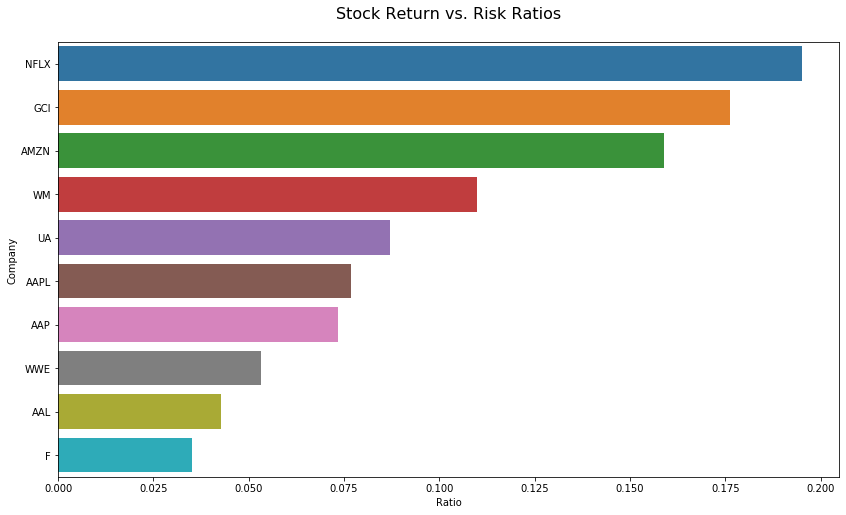

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

def barchart(df, x, y, length=8, width=14, title=""):
    df = df.sort_values(x, ascending=False)
    plt.figure(figsize=(width,length))
    chart = sns.barplot(data=df, x=x, y=y)
    plt.title(title + "\n", fontsize=16)
    return chart

bar_plot = barchart(top10, 'Ratio', 'Company', title='Stock Return vs. Risk Ratios')

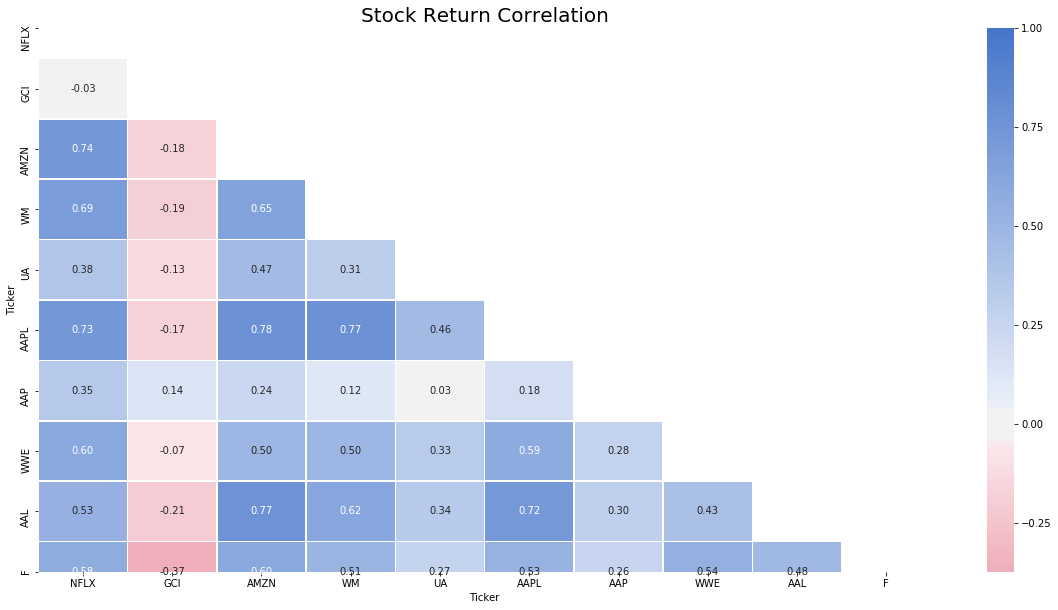

In [58]:
import numpy as np

def correlation_plot(corr, title=""):
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    plt.subplots(figsize=(20, 10))
    cmap = sns.diverging_palette(6, 255, as_cmap=True)
    
    chart = sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5, annot=True, fmt='.2f')
    plt.title(title, fontsize=20)
    return chart

corr_plot = correlation_plot(correlation, title='Stock Return Correlation')

In [59]:
def save_viz(chart, title):
    fig = chart.get_figure()
    fig.savefig(title + '.png')
save_viz(bar_plot, 'Stock Return vs. Risk Ratios')
save_viz(corr_plot, 'Stock Return Correlation')